In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
cur_path = "/content/drive/MyDrive/BDB 2024/"
os.chdir(cur_path)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/BDB 2024


# Pursuit Mean Absolute Difference

# Introduction

One of the most common ways to end a play in football is to tackle the player with the ball. Missed tackles can hinder a team's performance by allowing additional yards or allowing touchdowns; therefore, finding a player with a strong tackling ability can improve a team's chance of getting the opposing team's ball carrier down and mitigating damage. The below figure shows that plays with a mistackle have a higher yards per play than plays without a mistackle. This difference is statistically significant at the 95% confidence level.

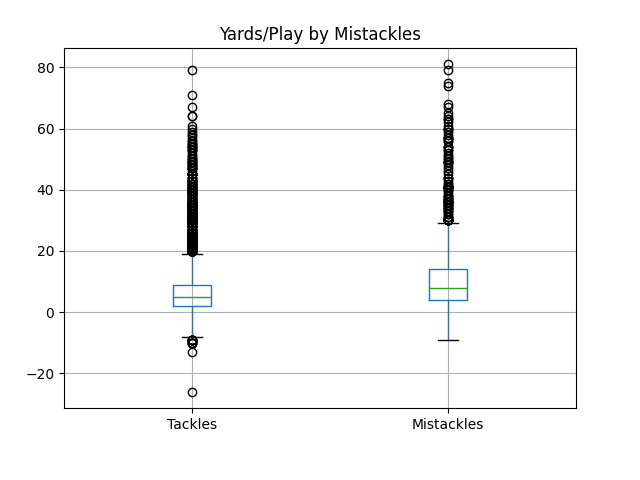

In [3]:
from IPython.display import Image
Image("./mistackles_avg_result.png")

Given the difference in yards per play, how can we predict a player's tackling ability to prevent these additional yards? We can use the the total number of tackles a player has as a baseline and improve upon this. The below figure shows the correlation of tackles in one week to tackles in the subsequent week. The data gives evidence that there is a moderate positive correlation week-over-week which is a strong baseline with which to work.

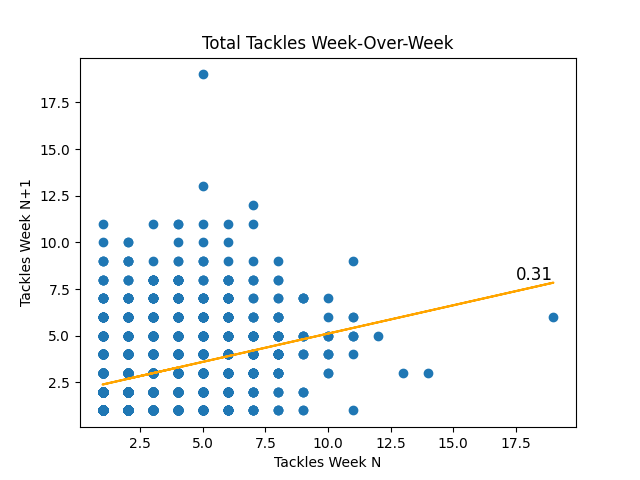

In [ ]:
Image("./tacklescorr.png")

This paper will look to improve upon this by calculating the optimal pursuit angle for each player in each frame of a play and measuring the mean absolute difference (MAD) for a player's actual pursuit angle and his optimal pursuit angle. The metric will from here on out be referenced as Pursuit Angle Mean Absolute Differece (PAMAD).

# Data

The data used in this study comes from weeks 1-8 in the 2022 season. The main datasets include tracking data and high-level game, play, player, and tackle data.

## Feature Engineering

From this data, base metrics were used like the down, distance, yards to go, speed of the defender and ball carrier, acceleration of the defender and ball carrier, player position, offensive formation, and defenders in the box. Additional features were also created to enhance the analysis like a standardization of the x- and y-coordinates as well as a standardization of the orientation and direction of the defender and ball carrier. These were engineered because plays moving in different directions can confuse the model and hinder performance. Additionally, the defenders distance to the nearest offensive non-ball carrier was used to determine the nearest blocker to the defender because any obstacles will change the pursuit angle of the defender. Finally, the label feature, pursuit angle, was created using the intersecting point of the defender and ball carrier which was derived from creating a line from both players using the player's respective direction. An example is shown below.

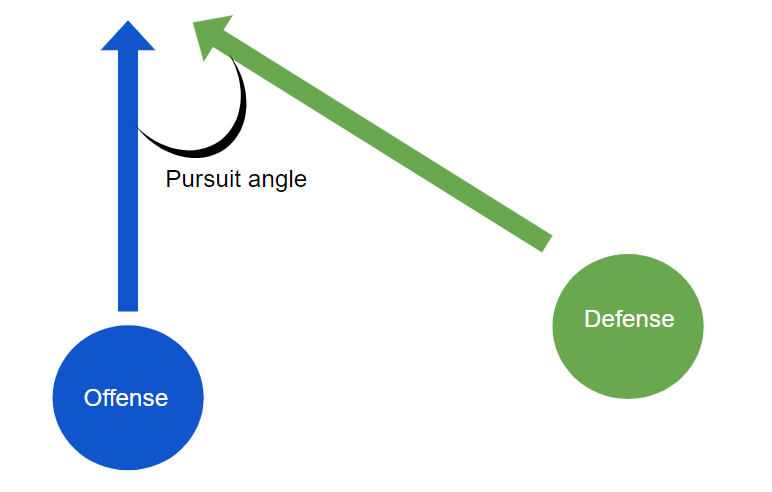

In [ ]:
Image("./PursuitAngleExample.png")

# Model

A linear regression model was used to calculate the optimal pursuit angle with the following independent features:

- Standardized x (defender and ball carrier)
- Standardized y (defender and ball carrier)
- Standardized direction (defender and ball carrier)
- Standardized orientation (defender and ball carrier)
- speed (defender and ball carrier)
- acceleration (defender and ball carrier)
- distance from the defender to the ball carrier
- distance from the defender to the nearest offensive non-ball carrier
- down
- distance
- yardline number
- Offensive Formation
- Defenders in the box
- Player position (as shown on the official roster)

The dependent (label) feature used is the pursuit angle.


# Results

## Feature Importance

From the linear regression model, the below figure shows the features in order of importance to the model.

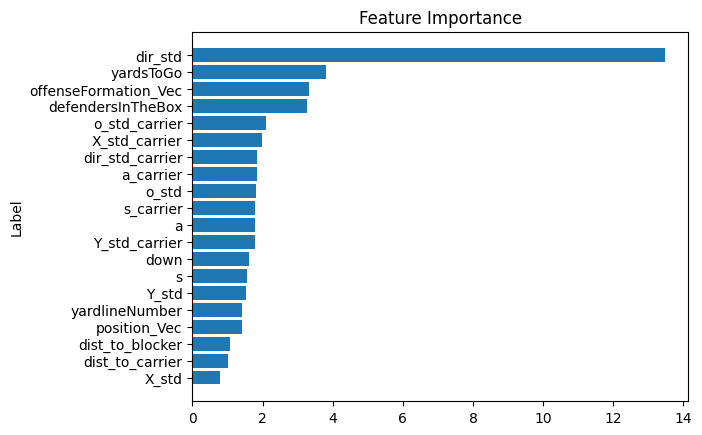

In [ ]:
Image("./featureimportance.png")

The most important feature, standardized direction, makes intuitive sense because the direction in which a defender is moving will determine the pursuit angle toward the ball carrier the defender must take. Yards to go is also a reasonable top feature because players are more inclined to take direct angles to prevent the offense from getting a first down in short yardage situation as opposed to medium and long situations. Additionally, the offensive formation and numbers of defenders in the box are important features which gives evidence that defenders angles are affected by other players being in the way.

## Evaluation

The correlation for PAMAD and tackles is used to determine if using the MAD will be a better predictor of tackling ability than tackles. The below visual shows the correlation between PAMAD and tackles. When filtering for players with more than 20 tackles during weeks 1-8 for the 2022 season, there is evidence that the correlation between PAMAD and tackles is just as good at predicting tackles as using tackles.

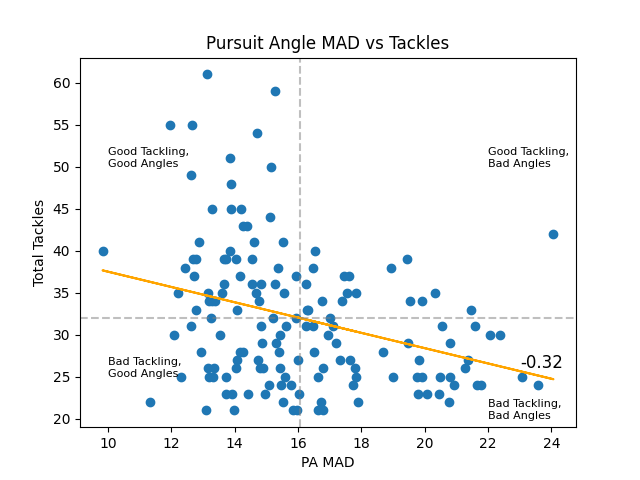

In [ ]:
Image("./madtackles.png")

Given the strong ability to predict tackling ability, we can see which players are the best tacklers based on PAMAD, smaller PAMAD numbers are better. The below table lists the top 10 tacklers. Players like Bobby Wagner, C.J. Mosley, Ernest Jones, Quay Walker, Demario Davis, Shaq Thompson, T.J. Edwards, and Zaire Franklin all finished the 2022 season in the top 50 players for tackles with Franklin, Edwards, and Mosley finishing inside the top 10.


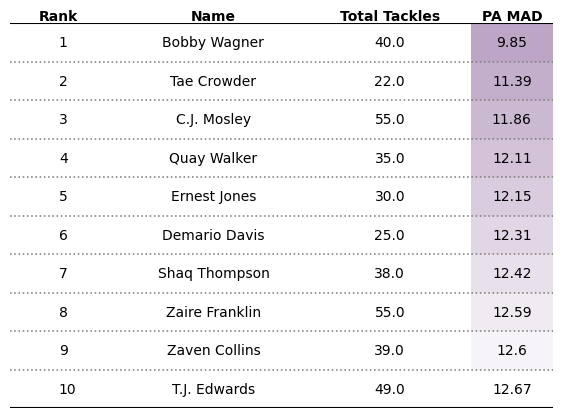

In [ ]:
Image("./abs_diff.png")

# Conclusions, Limitations, and Future Research

Tackling is one of the most common ways to end a play. It is also one the most important abilities for a defender because missed tackles can lead to additional yards if not touchdowns. From this research, we now have a way to predict future tackles that does just as good of a job at predicting future tackles as tackles.

Future research on this subject can be used to improve the performace of the model. Adding features such as location of all players on the field and number of blockers in between the defender and ball carrier can be used to improve the performance.

# Appendix

https://github.com/mattflaherty97/BDB2024